# PandasAI

# 1.환경준비

## (1) 라이브러리 설치

In [ ]:
!pip install pandasai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.5/134.5 kB 885.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


* 설치 후 런타임 재시작

## (2) 라이브러리 Import

In [ ]:
import pandas as pd
import numpy as np
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

In [ ]:
# openai key
api_key = 'your key'

# 2.무작정 사용해보기

## (1) 데이터 준비

In [ ]:
# Sample DataFrame
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "sales": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})
sales_by_country

,country,sales
0,United States,5000
1,United Kingdom,3200
2,France,2900
3,Germany,4100
4,Italy,2300
5,Spain,2100
6,Canada,2500
7,Australia,2600
8,Japan,4500
9,China,7000


In [ ]:
# Instantiate a LLM
llm = OpenAI(api_token=api_key)

## (2) 사용하기

In [ ]:
# 스마트 데이터프레임으로 변환
df = SmartDataframe(sales_by_country, config={"llm": llm})

# 질의
query = '매출이 가장 높은 국가는?'
df.chat(query)

'The country with the highest sales is China.'

## (3) 실습
* 몇가지 질문을 던지고 답변을 받아 봅시다.
* 아직 PandasAI 라이브러리가 안정적이지 않아, 오류가 발생될수 있습니다.

In [ ]:
query = '매출 상위 2개 국가는?'
df.chat(query)

,country,sales
9,China,7000
0,United States,5000


In [ ]:
query = '매출 총 합은?'
df.chat(query)

'The total sales amount is 36200.'

# 3.데이터 조회 및 분석

## (1) 데이터 준비

* 데이터프레임으로 저장하기

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


In [ ]:
air = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/airquality_simple.csv")
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


* Smart DataFrame 으로 저장

In [ ]:
titanic_sdf = SmartDataframe(titanic, config={"llm": llm})
air_sdf = SmartDataframe(air, config={"llm": llm})

## (2) 데이터 조회하기

* 다양한 질문으로 데이터를 조회해 봅시다.

### 1) titanic

In [ ]:
query = "타이타닉 탑승객 데이터야. 여자 승객은 총 몇명이야?"
titanic_sdf.chat(query)

'The total number of female passengers on the Titanic is 314.'

In [ ]:
query = "타이타닉 탑승객 데이터야. 여자 승객 중 이름에 Mrs 호칭이 붙은 승객 명단을 조회해줘"
titanic_sdf.chat(query)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,Southampton
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,Cherbourg
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,16.0000,Southampton
...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,52.5542,Southampton
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,24.0000,Cherbourg
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,83.1583,Cherbourg
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,26.0000,Southampton


In [ ]:
query = "타이타닉 탑승객 데이터야. 칼럼 이름 조회"
titanic_sdf.chat(query)

'PassengerId, Survived, Pclass, Name, Sex, Age, Fare, Embarked'

In [ ]:
query = "Age 칼럼의 기초통계량을 조회해줘. 결과는 데이터프레임 형태로 보여줘."
titanic_sdf.chat(query)

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


* 실습
    * 위 질문을 변형해서 탐색해 봅시다.

### 2) air

* air quality 데이터에 대해서 다양한 조회를 시도해 보세요.
    * 예
        * 가장 오존농도가 높은 날은?
        * 요일별 평균 오존농도 조회해줘.
        * 각 변수 상호간의 상관계수 조회


In [ ]:
query = "오존 농도가 가장 높은 날은?"
air_sdf.chat(query)

'The date with the highest Ozone concentration is 1973-08-25.'

In [ ]:
query = "각 변수 상호간의 상관계수 조회"
air_sdf.chat(query)

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.280068,-0.605478,0.683372
Solar.R,0.280068,1.000000,-0.056792,0.275840
Wind,-0.605478,-0.056792,1.000000,-0.457988
Temp,0.683372,0.275840,-0.457988,1.000000


In [ ]:
query = "요일별 평균 오존농도 조회."
air_sdf.chat(query)

,Day_of_Week,Ozone
0,Friday,35.727273
1,Monday,42.047619
2,Saturday,47.545455
3,Sunday,42.454545
4,Thursday,36.863636
5,Tuesday,47.681818
6,Wednesday,42.045455


In [ ]:
query = "데이터에 NaN이 있어. ffill로 채워서 조회해"
air_sdf.chat(query)

,Ozone,Solar.R,Wind,Temp,Date,Day_of_Week
0,41,190.0,7.4,67,1973-05-01,Tuesday
1,36,118.0,8.0,72,1973-05-02,Wednesday
2,12,149.0,12.6,74,1973-05-03,Thursday
3,18,313.0,11.5,62,1973-05-04,Friday
4,19,313.0,14.3,56,1973-05-05,Saturday
...,...,...,...,...,...,...
148,30,193.0,6.9,70,1973-09-26,Wednesday
149,23,145.0,13.2,77,1973-09-27,Thursday
150,14,191.0,14.3,75,1973-09-28,Friday
151,18,131.0,8.0,76,1973-09-29,Saturday


## (3) 데이터 분석하기

* 단변량, 이변량 분석을 위한 질문을 통해 그래프와 기초 통계량을 구해 봅시다.

### 1) titanic

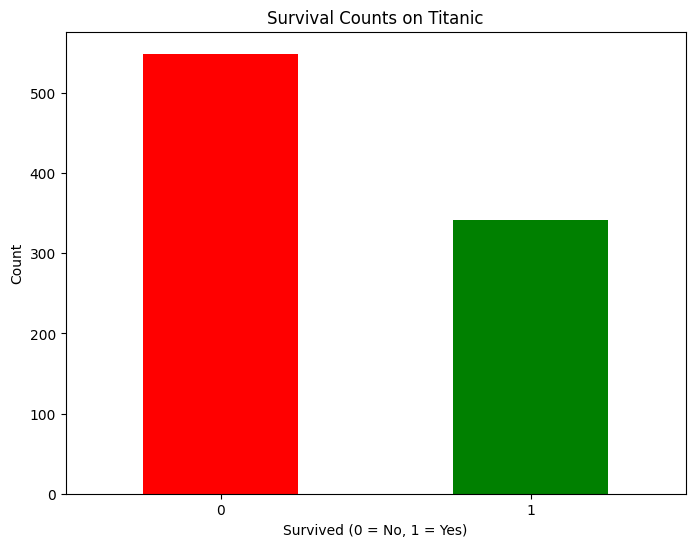

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = "생존여부에 대해 막대그래프 그려줘"
titanic_sdf.chat(query)

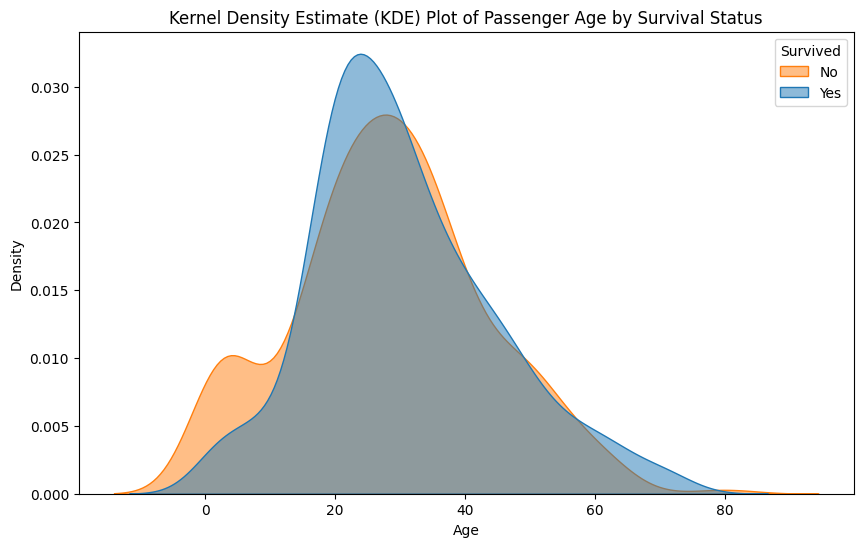

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = "생존여부 별로 탑승객 나이에 대해 kdeplot 그려줘"
titanic_sdf.chat(query)

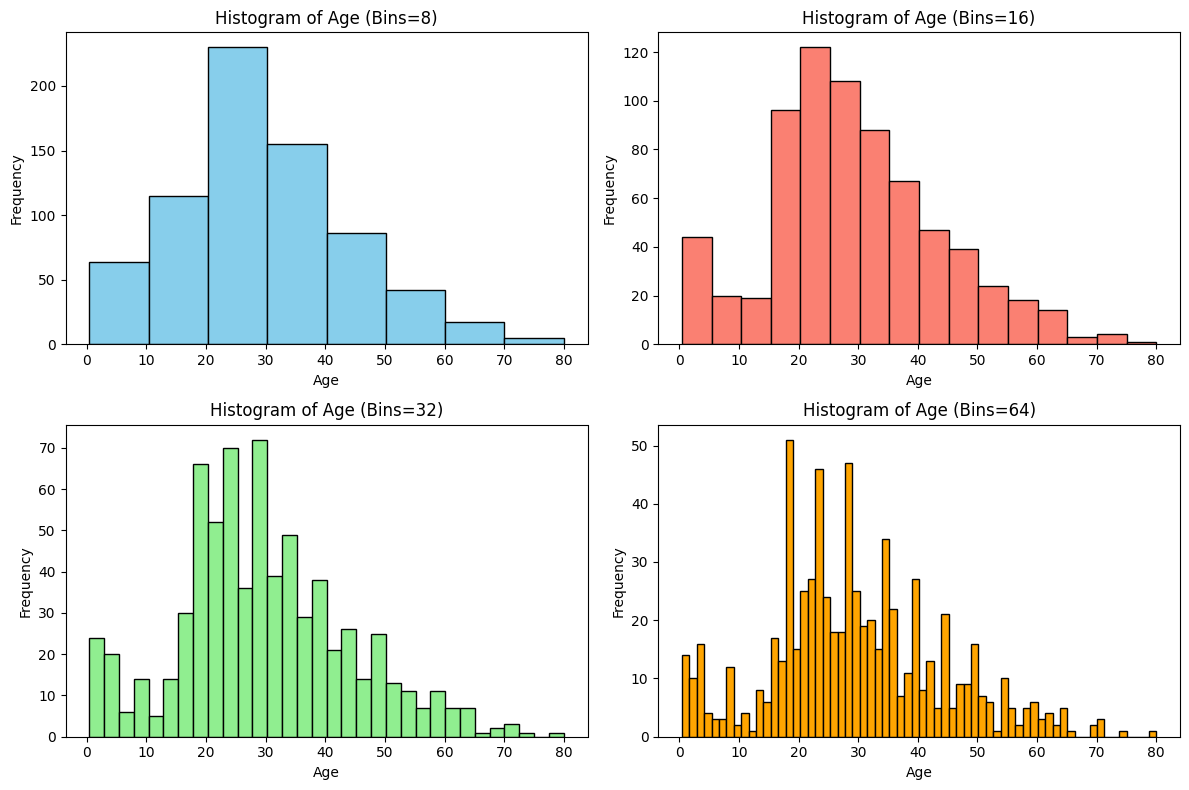

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = "Age에 대한 히스토그램을 그려줘. 그릴 때, bin의 수를 8, 16, 32, 64로 지정해"
titanic_sdf.chat(query)

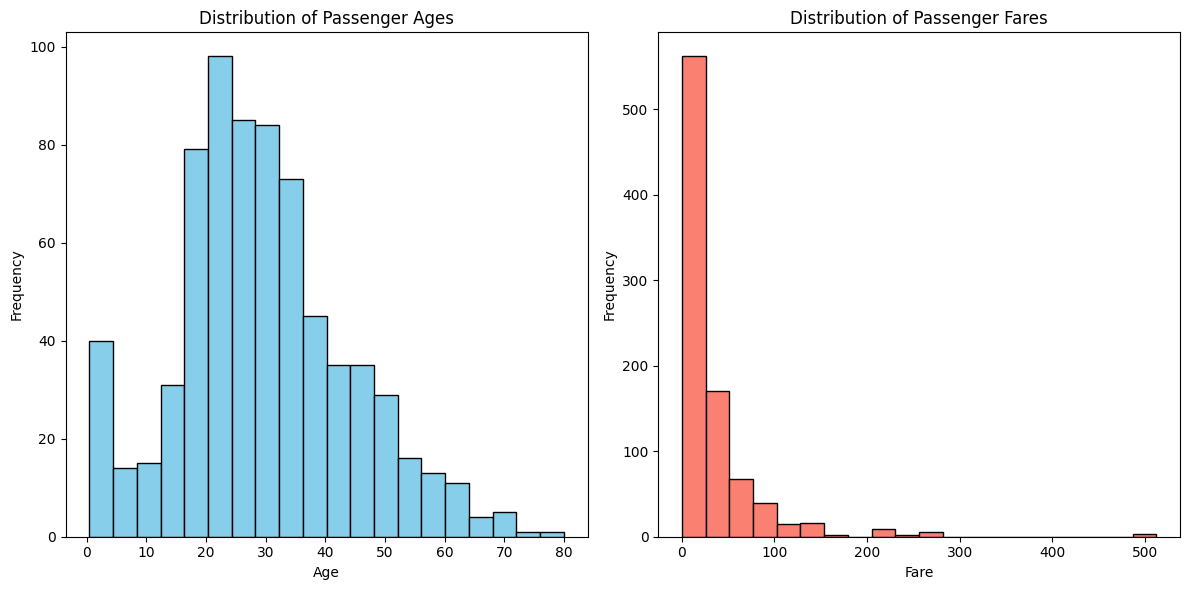

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 64, in execute
    result = code_manager.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 211, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned



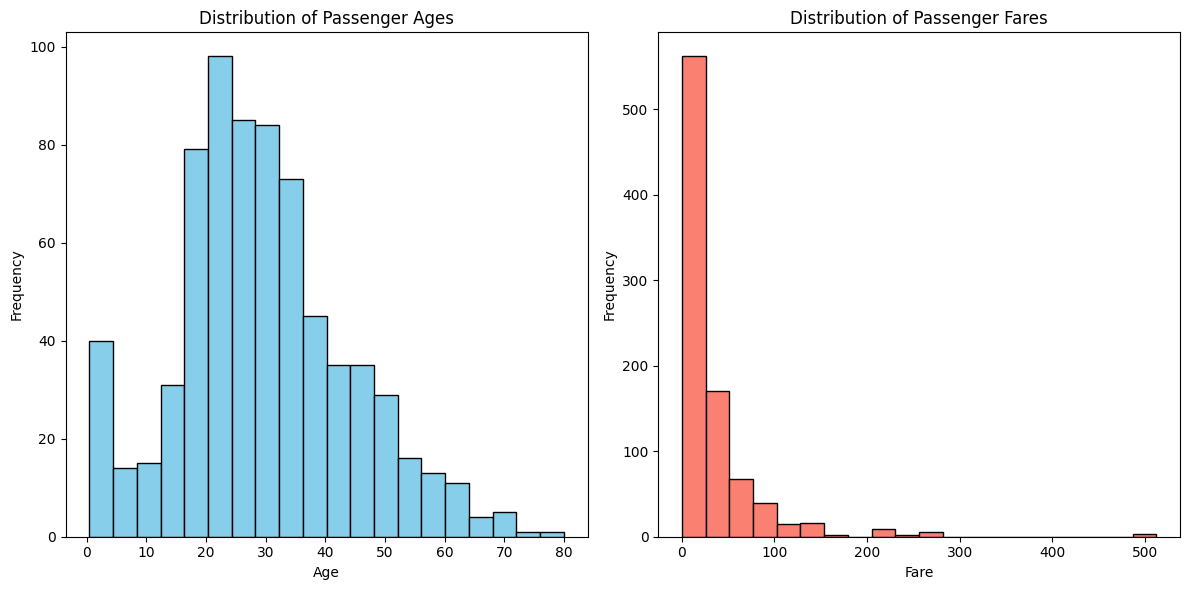

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 64, in execute
    result = code_manager.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 211, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 64, in execute
    result = code_manager.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 211, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned



Number of NaN values in 'Age': 177
Number of NaN values in 'Embarked': 2
Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked']


ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 64, in execute
    result = code_manager.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 211, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: No result returned


Number of NaN values in 'Age': 177
Number of NaN values in 'Embarked': 2
Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked']


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 93, in execute
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 64, in execute
    result = code_manager.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 211, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned


'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [ ]:
df.chat("수치형 변수가, Age, Fare야. 이 둘에 대해서 히스토그램 그려줘")

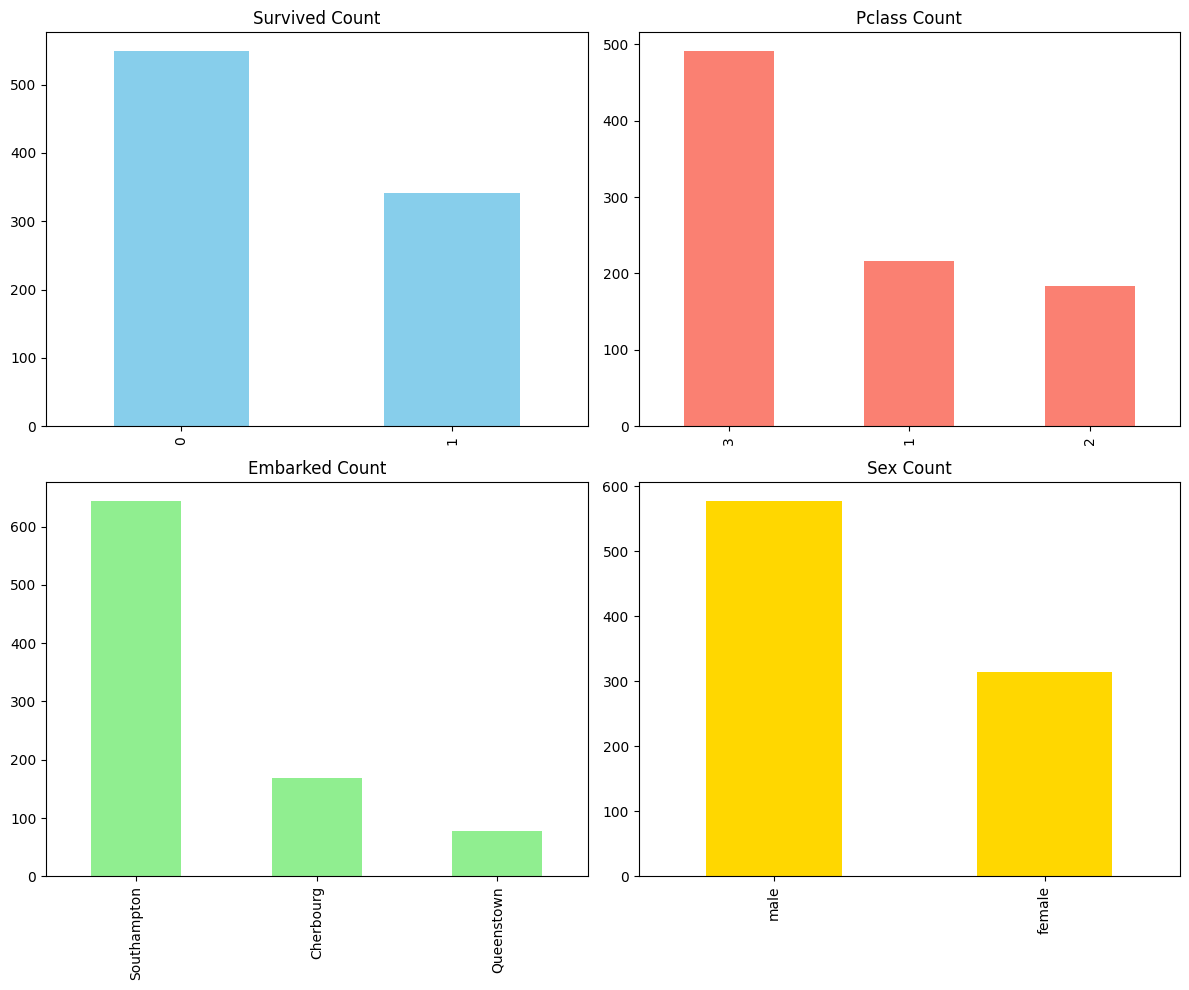

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
df.chat("범주형 변수가 Survived, Pclass, Embarked, Sex 야. 이 변수들에 대해서 막대 그래프 그려줘")

### 2) air

* air quality 데이터에 대해서 그래프를 4개 이상 그려 봅시다.

# 4.실습
* 카시트 데이터에 대해 단변량, 이변량 분석을 수행해 봅시다.
* 수치형, 범주형에 맞게 그래프를 그리도록 요청하고
* 해석은 우리가 합니다.

## (1) 데이터 준비

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_simple.csv")
data.head()

,Sales,CompPrice,Income,Price,ShelveLoc,Urban,US
0,9.50,138,73,120,Bad,Yes,Yes
1,11.22,111,48,83,Good,Yes,Yes
2,10.06,113,35,80,Medium,Yes,Yes
3,7.40,117,100,97,Medium,Yes,Yes
4,4.15,141,64,128,Bad,Yes,No


In [ ]:
data_sdf = SmartDataframe(data, config={"llm": llm})

## (2) 단변량 분석

In [ ]:
query = '데이터프레임 전체에 대한 기초통계량 조회'
data_sdf.chat(query)

,Sales,CompPrice,Income,Price
count,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,115.795000
std,2.824115,15.334512,27.986037,23.676664
min,0.000000,77.000000,21.000000,24.000000
25%,5.390000,115.000000,42.750000,100.000000
50%,7.490000,125.000000,69.000000,117.000000
75%,9.320000,135.000000,91.000000,131.000000
max,16.270000,175.000000,120.000000,191.000000


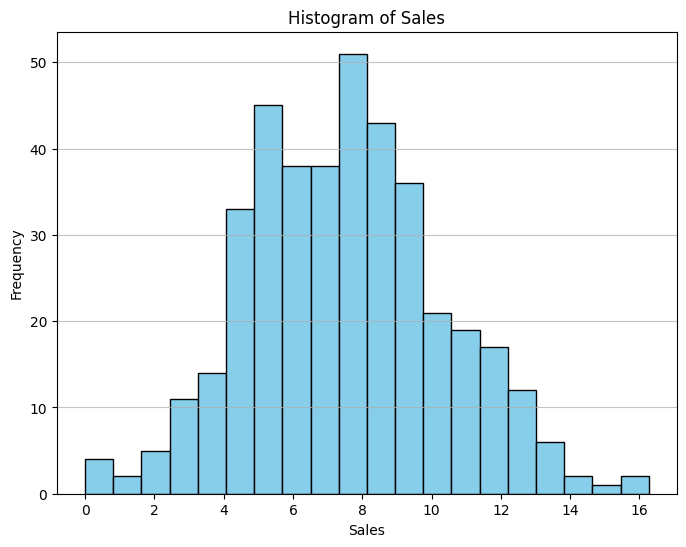

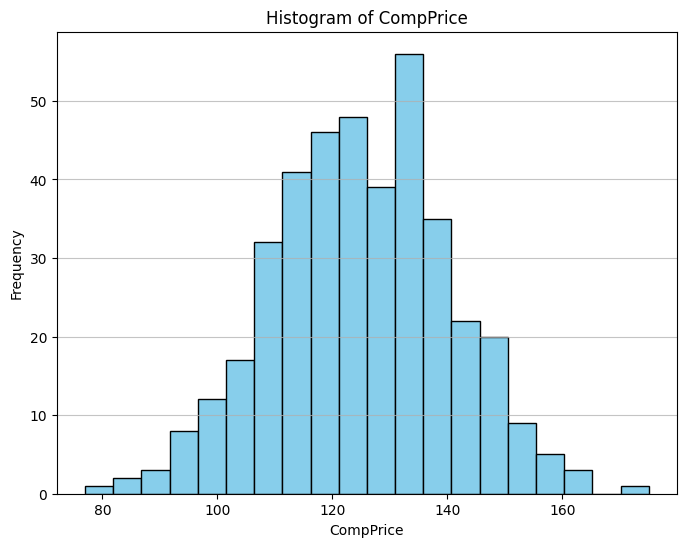

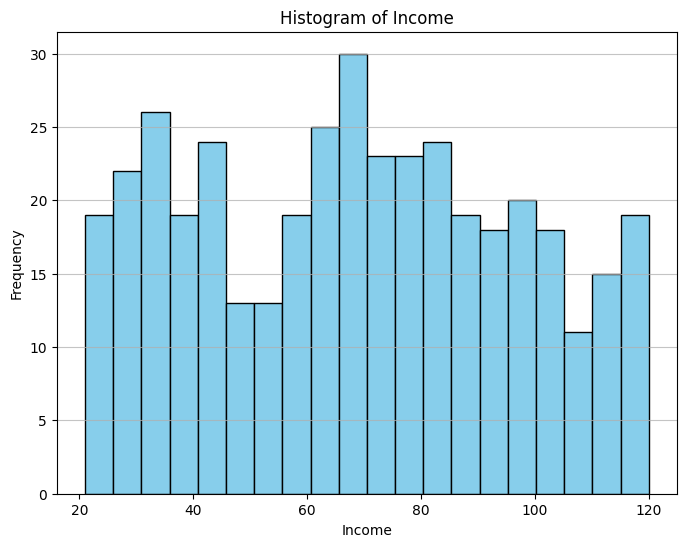

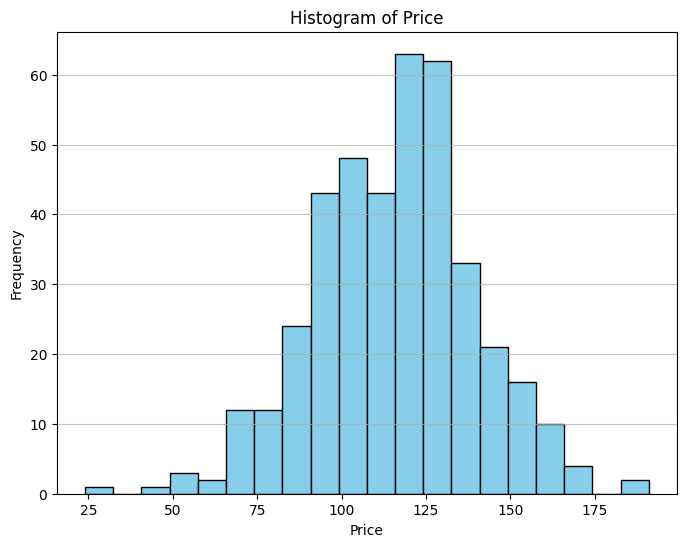

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = '수치형 변수들에 대해 히스토그램 그려줘'
data_sdf.chat(query)

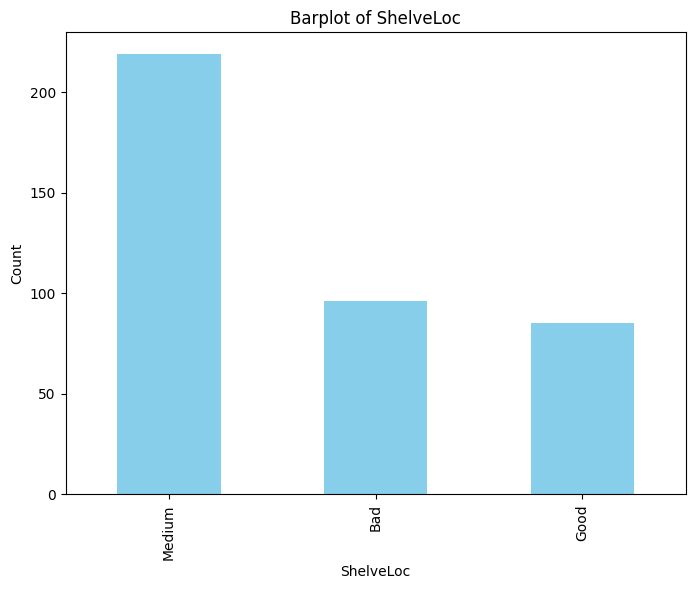

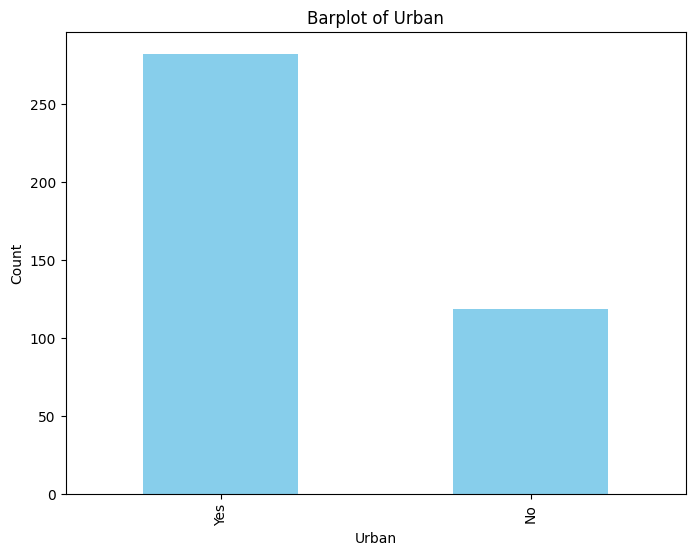

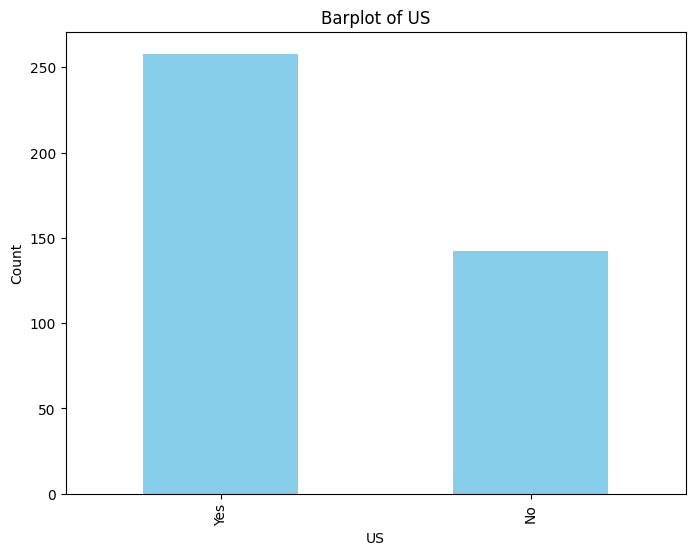

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = '범주형 변수들에 대해 barplot 그려줘'
data_sdf.chat(query)

## (3) 이변량 분석

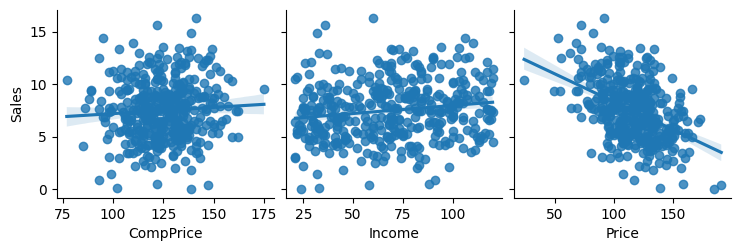

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = 'target이 Sales야. 수치형 feature 들과 산점도를 그려줘, 이때, regression line 추가'
data_sdf.chat(query)

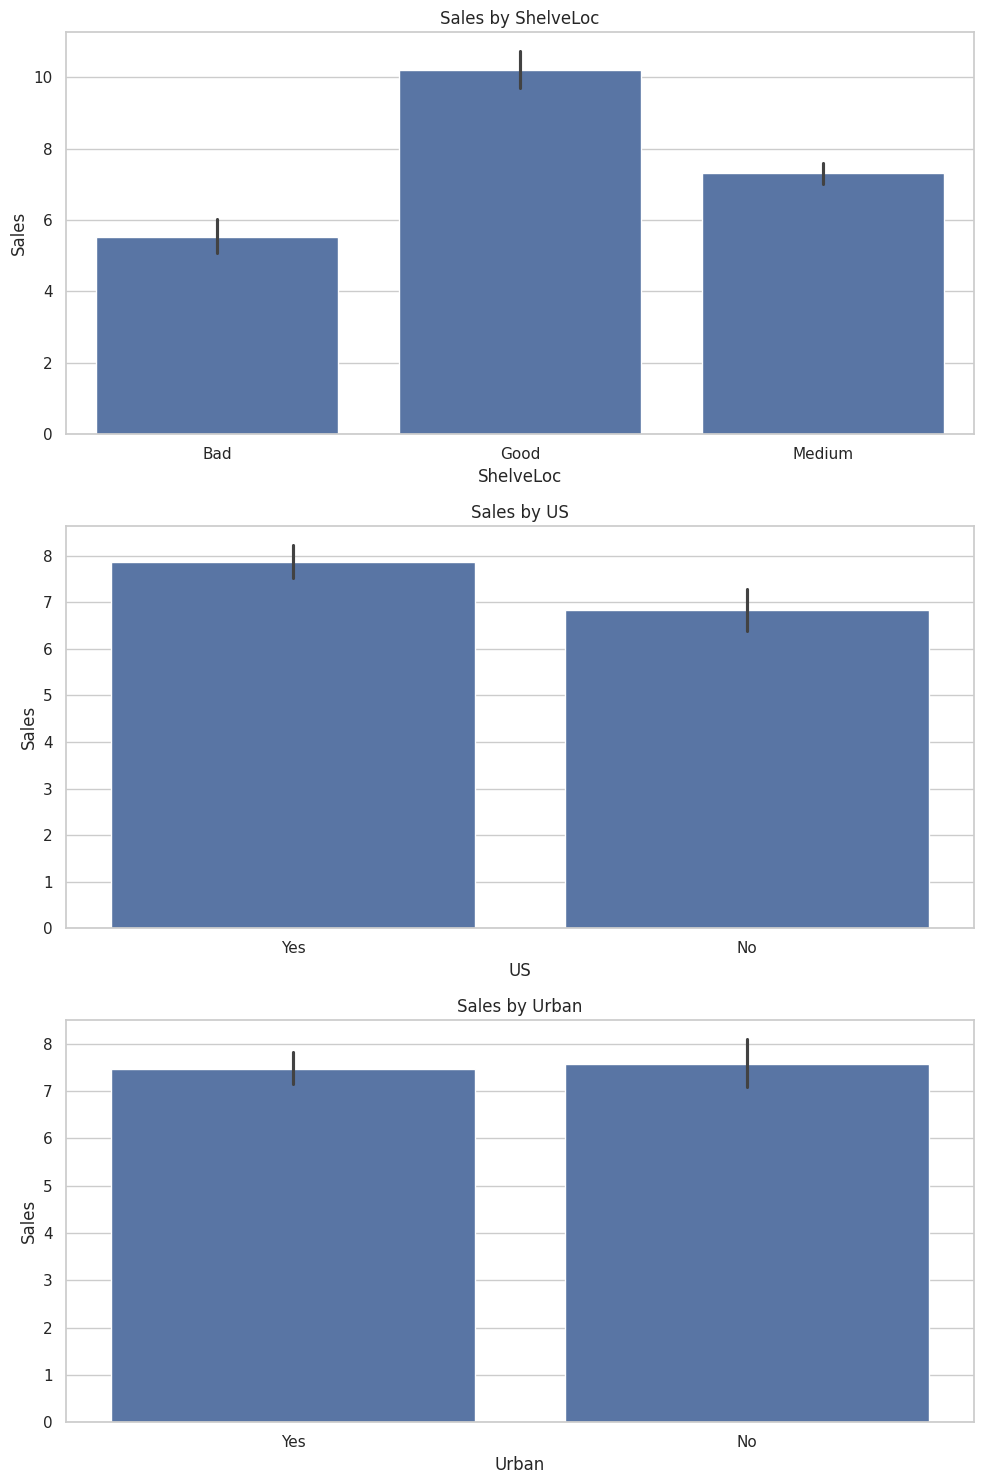

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = 'target이 Sales야. 범주형 feature는 ShelveLoc, US, Urban 이야. sns.barplot 그려줘'
data_sdf.chat(query)

## (4) 추가분석

* 추가 분석할 요소를 2개 이상 뽑아서 그래프를 그려 봅시다.

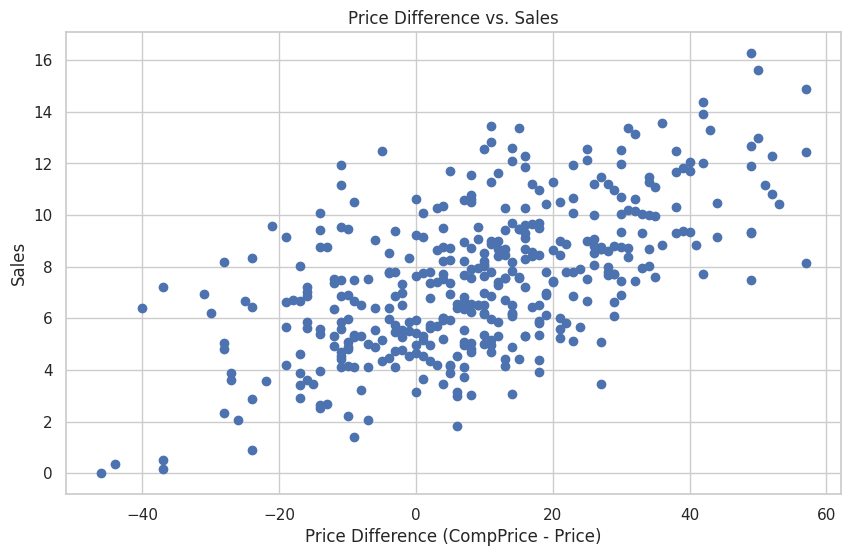

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = 'target이 Sales야. CompPrice와 Price의 차이와 Sales를 비교해줘'
data_sdf.chat(query)

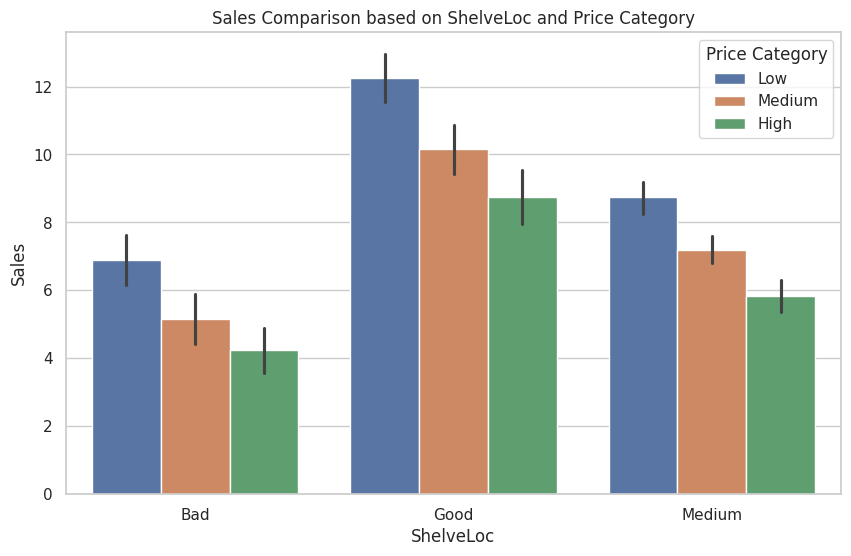

ERROR:pandasai.helpers.logger:Pipeline failed on step 5: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 281, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 115, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 29, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = 'Price를 3등분하고, ShelveLoc에 따라 Sales 관계를 sns.barplot으로 그릴때, Price 3등분한 것과 비교해'
data_sdf.chat(query)